In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = "../data/features"
csv_files = [f for f in os.listdir(DATA_DIR) if f.endswith(".csv")]

datasets = {name: pd.read_csv(os.path.join(DATA_DIR, name)) for name in csv_files}


## Diagnostic global par dataset

In [3]:
def quick_overview(df, name):
    print(f"\n📘 {name}")
    print(f"Shape: {df.shape}")
    print("Colonnes:", list(df.columns))
    print("Types:", df.dtypes.value_counts(), "\n")
    print(df.head(2))

for name, df in datasets.items():
    quick_overview(df, name)



📘 fire_soil_ids.csv
Shape: (91102, 3)
Colonnes: ['latitude', 'longitude', 'HWSD2_SMU_ID']
Types: float64    2
int64      1
Name: count, dtype: int64 

    latitude  longitude  HWSD2_SMU_ID
0  19.010231   3.276132          1796
1  19.010231   3.326132          1796

📘 grid_elevation.csv
Shape: (91102, 3)
Colonnes: ['latitude', 'longitude', 'elevation']
Types: float64    2
int64      1
Name: count, dtype: int64 

    latitude  longitude  elevation
0  19.010231   3.276132        499
1  19.010231   3.326132        462

📘 grid_fire.csv
Shape: (179413, 3)
Colonnes: ['latitude', 'longitude', 'fire']
Types: float64    2
int64      1
Name: count, dtype: int64 

    latitude  longitude  fire
0  19.010231   3.276132     0
1  19.010231   3.326132     0

📘 grid_landcover.csv
Shape: (91102, 3)
Colonnes: ['latitude', 'longitude', 'GRIDCODE']
Types: float64    3
Name: count, dtype: int64 

    latitude  longitude  GRIDCODE
0  19.010231   3.276132     202.0
1  19.010231   3.326132     201.0

📘 grid_po

### Missing Values

✅ Aucun missing value dans fire_soil_ids.csv
✅ Aucun missing value dans grid_elevation.csv
✅ Aucun missing value dans grid_fire.csv

🔹 grid_landcover.csv - Pourcentage de valeurs manquantes :
GRIDCODE    0.051591
dtype: float64


C:\Users\IFTA\AppData\Local\Temp\ipykernel_19448\93736580.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="coolwarm")


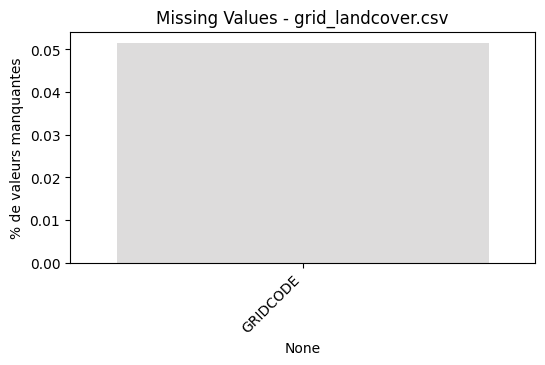

✅ Aucun missing value dans grid_points.csv

🔹 grid_soil.csv - Pourcentage de valeurs manquantes :
TEXTURE_USDA     18.959293
REF_BULK         18.959293
SAND              0.001018
SILT              0.001018
CLAY              0.001018
COARSE            0.001018
TEXTURE_SOTER     0.001018
BULK              0.001018
ORG_CARBON        0.001018
PH_WATER          0.001018
TOTAL_N           0.001018
CN_RATIO          0.001018
CEC_SOIL          0.001018
CEC_CLAY          0.001018
CEC_EFF           0.001018
TEB               0.001018
BSAT              0.001018
ALUM_SAT          0.001018
ESP               0.001018
TCARBON_EQ        0.001018
GYPSUM            0.001018
ELEC_COND         0.001018
dtype: float64


C:\Users\IFTA\AppData\Local\Temp\ipykernel_19448\93736580.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="coolwarm")


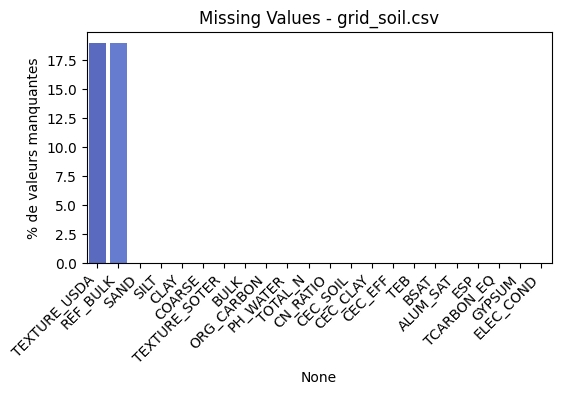


🔹 grid_tmax.csv - Pourcentage de valeurs manquantes :
acq_date    49.697068
tmax         0.227408
dtype: float64


C:\Users\IFTA\AppData\Local\Temp\ipykernel_19448\93736580.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="coolwarm")


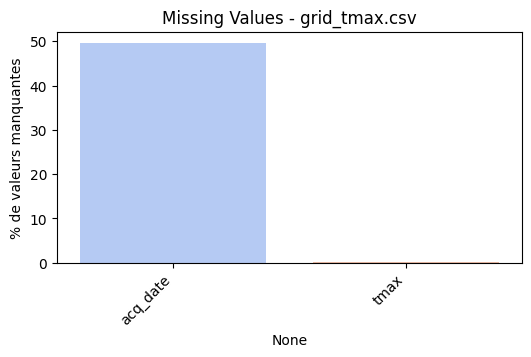


🔹 grid_tmin.csv - Pourcentage de valeurs manquantes :
acq_date    49.697068
tmin         0.227408
dtype: float64


C:\Users\IFTA\AppData\Local\Temp\ipykernel_19448\93736580.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="coolwarm")


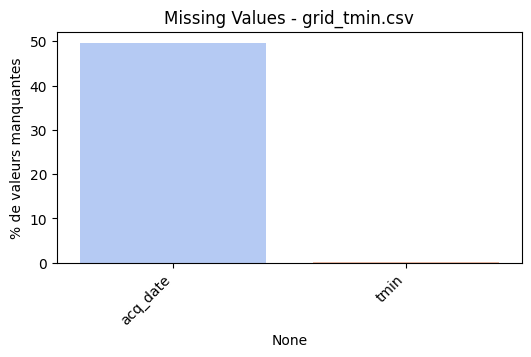


🔹 grid_tprec.csv - Pourcentage de valeurs manquantes :
acq_date    49.697068
tprec        0.227408
dtype: float64


C:\Users\IFTA\AppData\Local\Temp\ipykernel_19448\93736580.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="coolwarm")


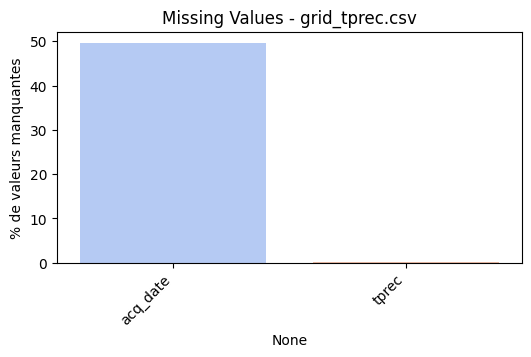

In [4]:
def plot_missing_values(df, name):
    missing = df.isnull().mean() * 100
    missing = missing[missing > 0].sort_values(ascending=False)

    if missing.empty:
        print(f"✅ Aucun missing value dans {name}")
    else:
        print(f"\n🔹 {name} - Pourcentage de valeurs manquantes :")
        print(missing)

        plt.figure(figsize=(6, 3))
        sns.barplot(x=missing.index, y=missing.values, palette="coolwarm")
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("% de valeurs manquantes")
        plt.title(f"Missing Values - {name}")
        plt.show()

for name, df in datasets.items():
    plot_missing_values(df, name)



📊 fire_soil_ids.csv - % d’outliers estimés par colonne :
HWSD2_SMU_ID    6.733112
Name: Outlier %, dtype: float64


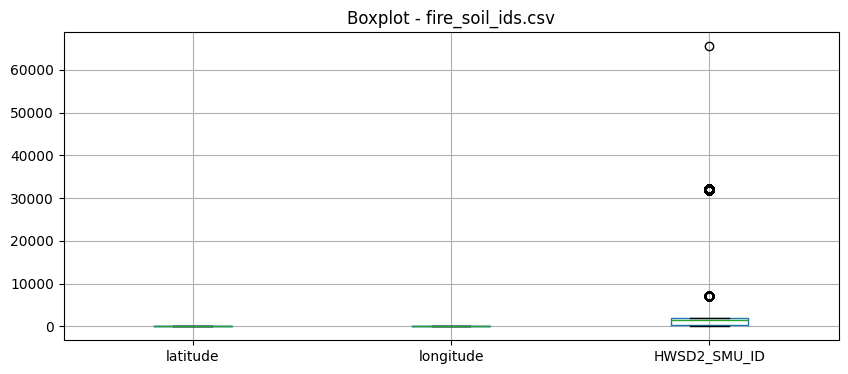


📊 grid_elevation.csv - % d’outliers estimés par colonne :
elevation    2.94066
Name: Outlier %, dtype: float64


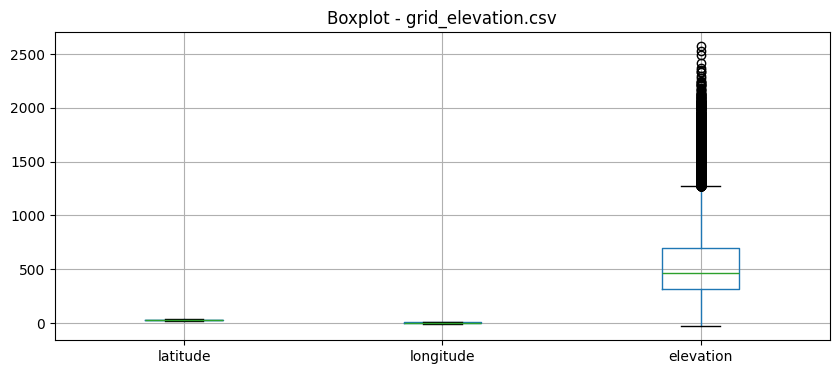


📊 grid_fire.csv - % d’outliers estimés par colonne :
longitude    2.290247
latitude     1.472580
Name: Outlier %, dtype: float64


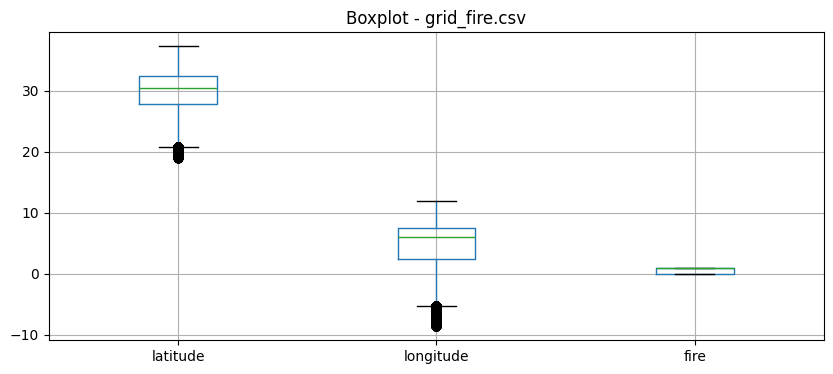


📊 grid_landcover.csv - % d’outliers estimés par colonne :
GRIDCODE    12.345503
Name: Outlier %, dtype: float64


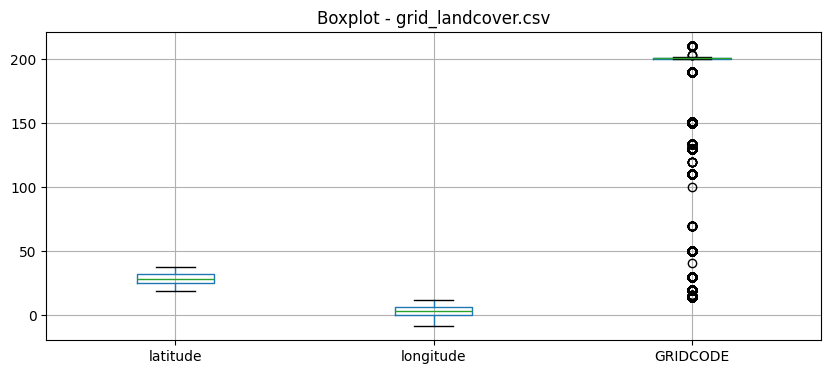


📊 grid_points.csv - % d’outliers estimés par colonne :
Series([], Name: Outlier %, dtype: float64)


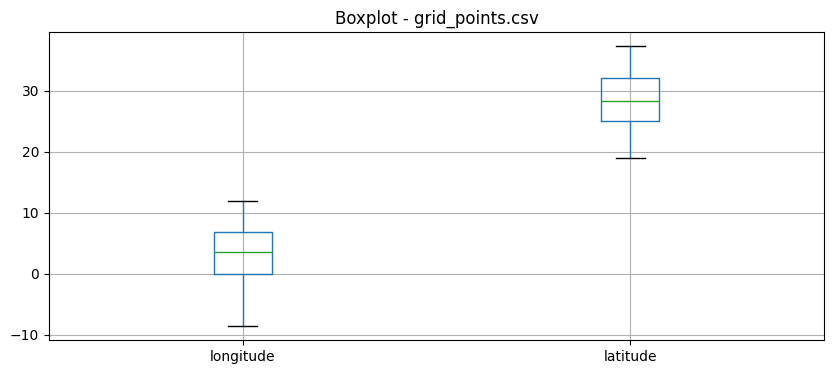


📊 grid_soil.csv - % d’outliers estimés par colonne :
ELEC_COND       38.041292
ESP             32.474733
ORG_CARBON      26.771213
CLAY            24.252947
TOTAL_N         24.024847
PH_WATER        20.207225
BULK            20.056007
ALUM_SAT        19.274458
SILT            18.979659
CN_RATIO        18.979659
BSAT            18.958275
SAND            18.958275
CEC_EFF         10.596981
TEXTURE_USDA     5.241720
GYPSUM           4.539599
TEB              3.839006
REF_BULK         2.360429
CEC_SOIL         0.733688
TCARBON_EQ       0.413431
COARSE           0.330440
Name: Outlier %, dtype: float64


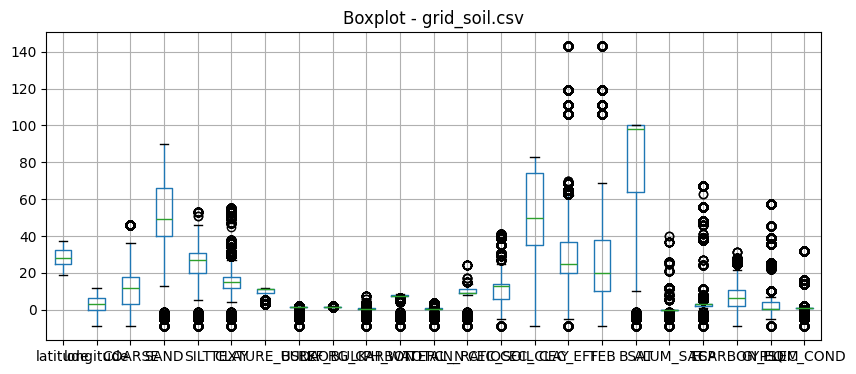


📊 grid_tmax.csv - % d’outliers estimés par colonne :
longitude    2.290247
latitude     1.472580
tmax         0.322162
Name: Outlier %, dtype: float64


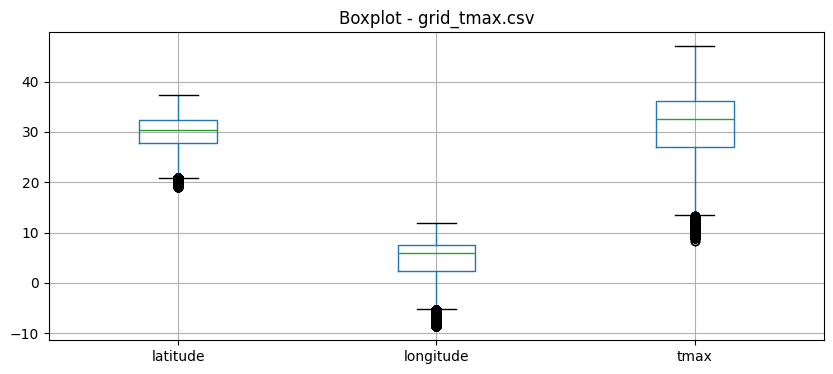


📊 grid_tmin.csv - % d’outliers estimés par colonne :
longitude    2.290247
latitude     1.472580
tmin         0.001115
Name: Outlier %, dtype: float64


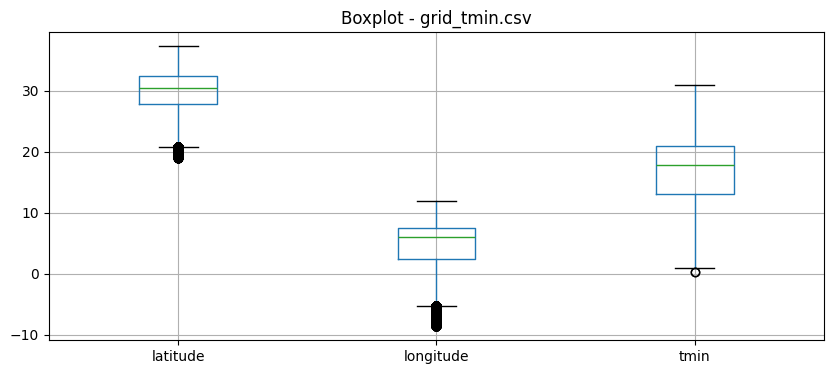


📊 grid_tprec.csv - % d’outliers estimés par colonne :
tprec        13.942691
longitude     2.290247
latitude      1.472580
Name: Outlier %, dtype: float64


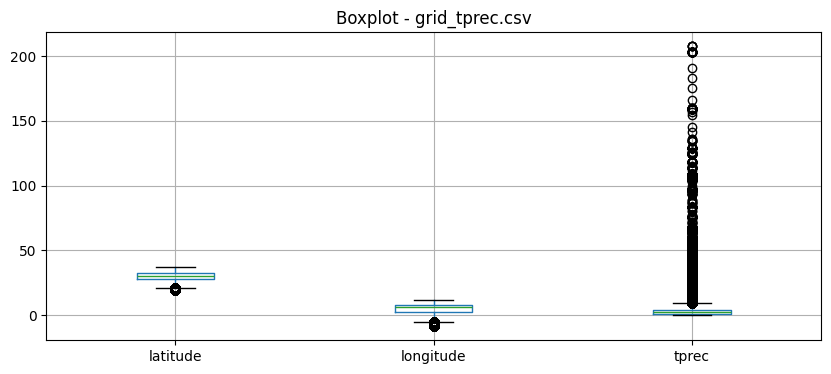

In [5]:
def detect_outliers_iqr(df):
    outlier_info = {}
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_info[col] = outliers / len(df) * 100  # en %
    return pd.Series(outlier_info, name="Outlier %").sort_values(ascending=False)

for name, df in datasets.items():
    outlier_stats = detect_outliers_iqr(df)
    print(f"\n📊 {name} - % d’outliers estimés par colonne :")
    print(outlier_stats[outlier_stats > 0])

    # Visualisation rapide
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        df[numeric_cols].boxplot(figsize=(10, 4))
        plt.title(f"Boxplot - {name}")
        plt.show()


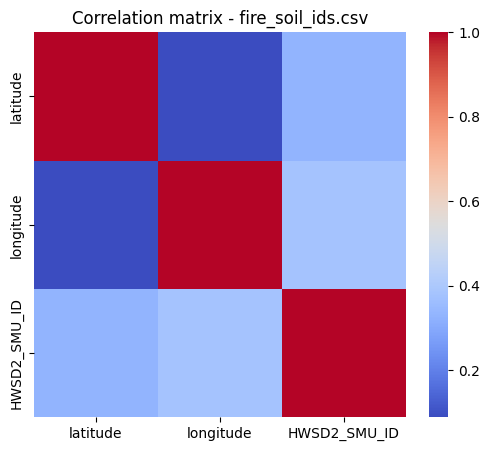

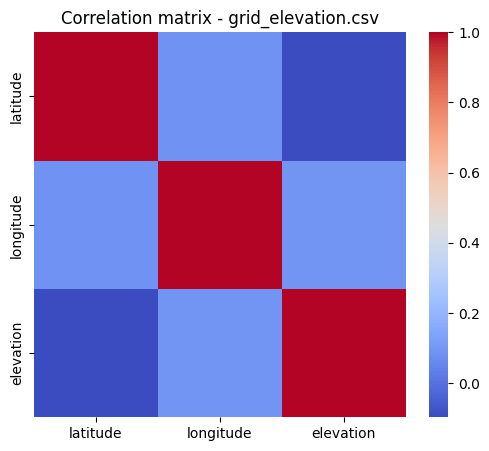

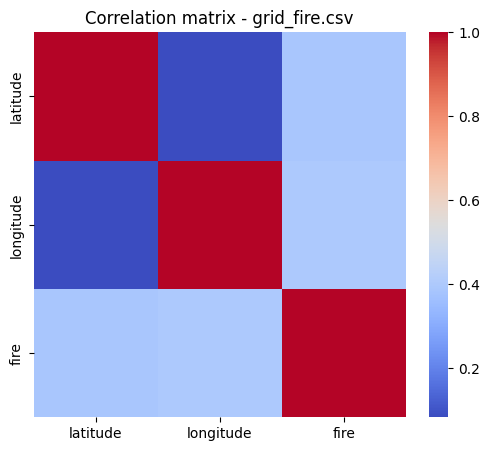

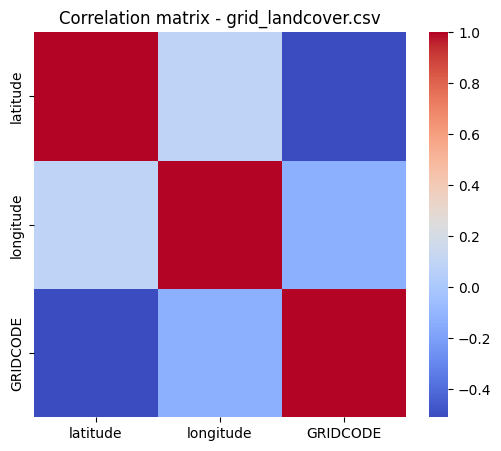

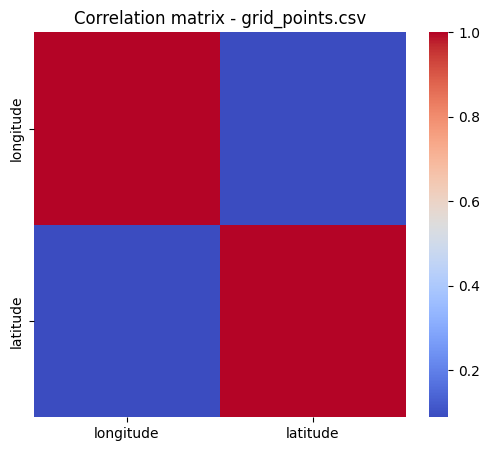

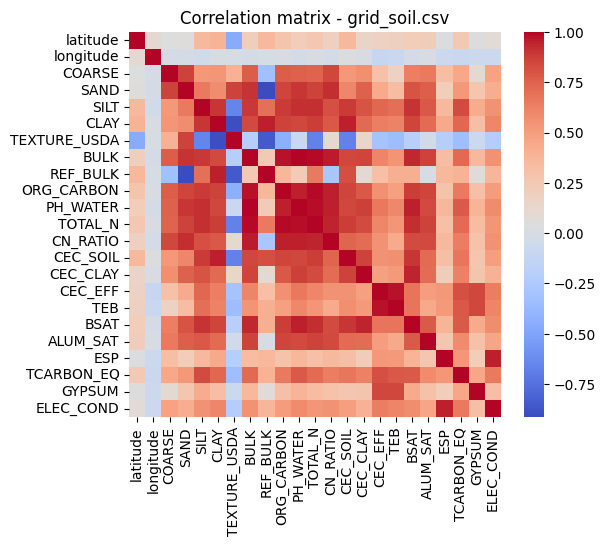

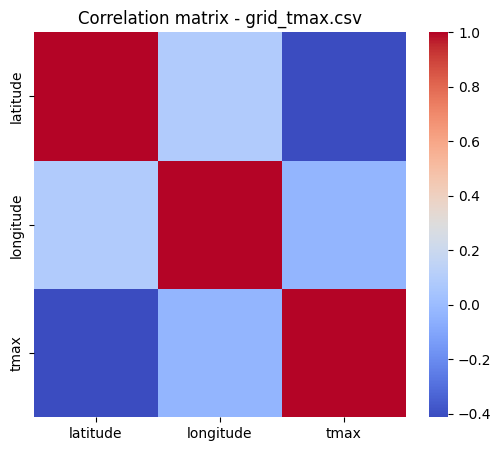

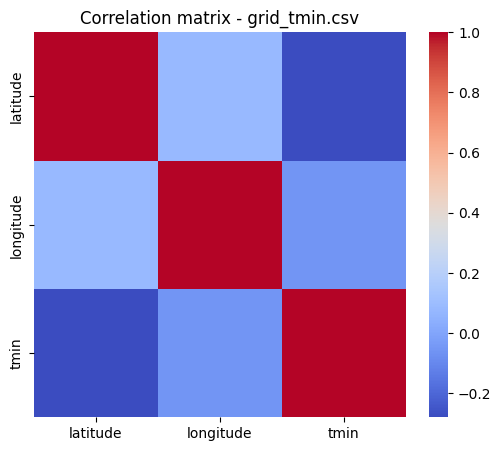

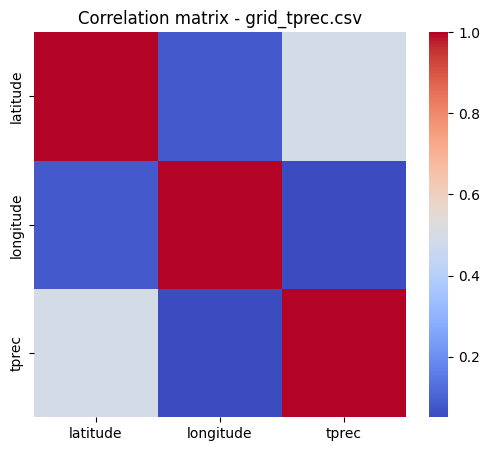

In [6]:
for name, df in datasets.items():
    num_df = df.select_dtypes(include=[np.number])
    if num_df.shape[1] > 1:
        plt.figure(figsize=(6, 5))
        sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
        plt.title(f"Correlation matrix - {name}")
        plt.show()


Missing values (%):
latitude     0.0
longitude    0.0
fire         0.0
dtype: float64


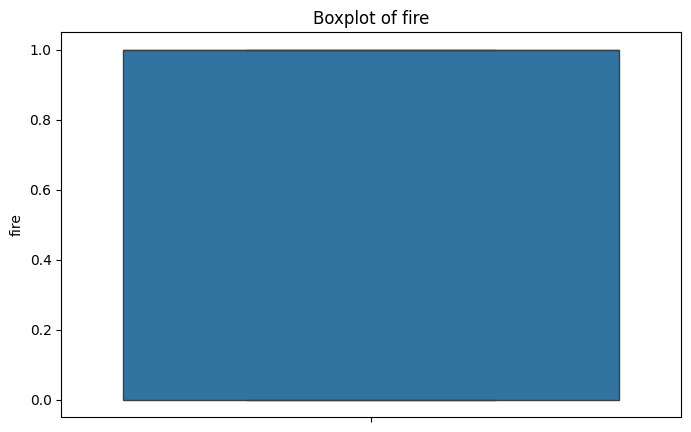

=== Outlier Detection Report for 'fire' ===
Q1 (25th percentile): 0.0000
Q2 (Median):          1.0000
Q3 (75th percentile): 1.0000
IQR (Q3 - Q1):        1.0000
Lower bound:          -1.5000
Upper bound:          2.5000
Number of outliers:   0 / 179413 rows
fire outliers (IQR): 0


In [8]:
fire_df = pd.read_csv("../data/features/grid_fire.csv")

# Missing values
print("Missing values (%):")
print(fire_df.isnull().mean()*100)

# Outlier visualisation (boxplot)
from eda_scripts.eda_utils import plot_boxplot, detect_outliers_iqr

num_fire = [c for c in fire_df.select_dtypes(include='number') if c not in ['longitude','latitude']]
for col in num_fire:
    plot_boxplot(fire_df, col)
    out_count = detect_outliers_iqr(fire_df, col).shape[0]
    print(f"{col} outliers (IQR):", out_count)


Missing values (%):
latitude     0.0
longitude    0.0
elevation    0.0
dtype: float64


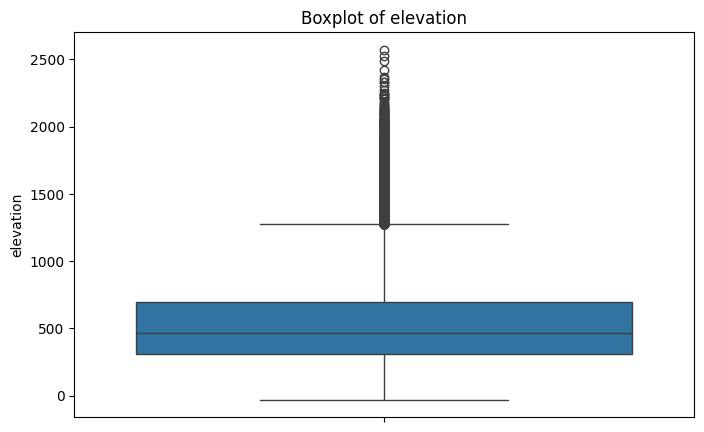

=== Outlier Detection Report for 'elevation' ===
Q1 (25th percentile): 312.0000
Q2 (Median):          464.0000
Q3 (75th percentile): 697.0000
IQR (Q3 - Q1):        385.0000
Lower bound:          -265.5000
Upper bound:          1274.5000
Number of outliers:   2679 / 91102 rows
elevation outliers (IQR): 2679


In [9]:
elev_df = pd.read_csv("../data/features/grid_elevation.csv")
print("Missing values (%):")
print(elev_df.isnull().mean()*100)

num_elev = [c for c in elev_df.select_dtypes(include='number') if c not in ['longitude','latitude']]
for col in num_elev:
    plot_boxplot(elev_df, col)
    out_count = detect_outliers_iqr(elev_df, col).shape[0]
    print(f"{col} outliers (IQR):", out_count)


Missing values (%):
latitude      0.000000
longitude     0.000000
acq_date     49.697068
tmax          0.227408
dtype: float64


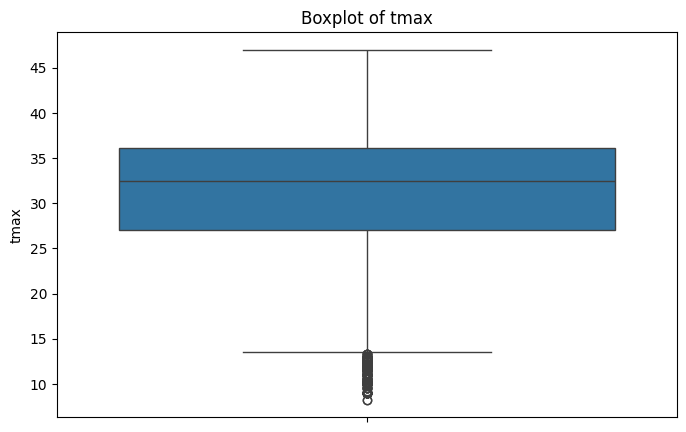

=== Outlier Detection Report for 'tmax' ===
Q1 (25th percentile): 27.0000
Q2 (Median):          32.5000
Q3 (75th percentile): 36.1250
IQR (Q3 - Q1):        9.1250
Lower bound:          13.3125
Upper bound:          49.8125
Number of outliers:   578 / 179413 rows
tmax outliers (IQR): 578


In [11]:
tmax_df = pd.read_csv("../data/features/grid_tmax.csv")
print("Missing values (%):")
print(tmax_df.isnull().mean()*100)

num_tmax = [c for c in tmax_df.select_dtypes(include='number') if c not in ['longitude','latitude']]
for col in num_tmax:
    plot_boxplot(tmax_df, col)
    out_count = detect_outliers_iqr(tmax_df, col).shape[0]
    print(f"{col} outliers (IQR):", out_count)


In [13]:

# 📂 Dossier contenant les CSV
DATA_DIR = "../data/features"

# Charger tous les CSV dans un dictionnaire
datasets = {f: pd.read_csv(os.path.join(DATA_DIR, f)) for f in os.listdir(DATA_DIR) if f.endswith(".csv")}

def dataset_diagnostic(df, name):
    print("="*80)
    print(f"📘 {name}")
    print("-"*80)
    
    # Dimensions et aperçu
    print(f"Shape : {df.shape}")
    print(f"Colonnes ({len(df.columns)}) : {list(df.columns)}")
    print("\n🔹 Aperçu :")
    print(df.head(2))
    print("-"*80)

    # Types de données
    print("\n🔸 Types de colonnes :")
    print(df.dtypes.value_counts())
    print("-"*80)
    
    # Valeurs manquantes
    missing = df.isnull().sum()
    total_missing = missing.sum()
    if total_missing > 0:
        print("\n⚠️ Missing values détectés :")
        missing_percent = (missing / len(df)) * 100
        print(missing_percent[missing_percent > 0].sort_values(ascending=False))
        print(f"➡️ Total colonnes avec missing : {(missing > 0).sum()} / {len(df.columns)}")
    else:
        print("\n✅ Aucune valeur manquante.")
    print("-"*80)
    
    # Statistiques basiques sur les colonnes numériques
    num_cols = df.select_dtypes(include=[np.number]).columns
    if len(num_cols) > 0:
        print("\n🔹 Colonnes numériques :", list(num_cols))
        print("\nStatistiques descriptives principales :")
        print(df[num_cols].describe().T[["mean", "std", "min", "25%", "50%", "75%", "max"]])
    else:
        print("\nℹ️ Aucune colonne numérique détectée.")
    print("-"*80)

    # Valeurs dupliquées
    duplicates = df.duplicated().sum()
    print(f"🔁 Lignes dupliquées : {duplicates}")

    # Valeurs constantes
    constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
    if constant_cols:
        print(f"⚠️ Colonnes constantes (1 seule valeur) : {constant_cols}")
    else:
        print("✅ Aucune colonne constante.")
    print("-"*80)

    # Corrélation moyenne (si applicable)
    if len(num_cols) > 1:
        corr_matrix = df[num_cols].corr().abs()
        mean_corr = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool)).mean().mean()
        print(f"📈 Corrélation moyenne entre variables numériques : {mean_corr:.3f}")
    print("="*80, "\n\n")


# 🔎 Exécuter le diagnostic sur tous les datasets
for name, df in datasets.items():
    dataset_diagnostic(df, name)


📘 fire_soil_ids.csv
--------------------------------------------------------------------------------
Shape : (91102, 3)
Colonnes (3) : ['latitude', 'longitude', 'HWSD2_SMU_ID']

🔹 Aperçu :
    latitude  longitude  HWSD2_SMU_ID
0  19.010231   3.276132          1796
1  19.010231   3.326132          1796
--------------------------------------------------------------------------------

🔸 Types de colonnes :
float64    2
int64      1
Name: count, dtype: int64
--------------------------------------------------------------------------------

✅ Aucune valeur manquante.
--------------------------------------------------------------------------------

🔹 Colonnes numériques : ['latitude', 'longitude', 'HWSD2_SMU_ID']

Statistiques descriptives principales :
                     mean          std        min         25%          50%  \
latitude        28.553596     4.410141  19.010231   25.060231    28.410231   
longitude        3.138031     4.524185  -8.623868   -0.073868     3.526132   
HWSD2_SMU